In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('soil_dataset.csv')
print(data.head(3))


  VILLAGE_NAME_ENGLISH    PH    EC  Organinc Carbon  PHOSPHOROUS  POTASH  \
0            KURUNDWAD  7.22  0.42              0.6         12.9   400.0   
1             ARJUNWAD  7.59  1.10              0.7         26.0   560.0   
2             ARJUNWAD  7.58  0.42              0.6         19.0   227.0   

   CALCIUM_CARBONATE  FERROUS  MANAGESE  ZINK  COPPER  Total Rating Value  
0                5.6     14.4      38.0  0.04    2.14              481.32  
1                7.2     26.0      40.0  0.60    5.00              674.19  
2                6.8     23.0      38.0  0.40    4.00              326.80  


In [31]:
data['Quality'] = pd.cut(data["Total Rating Value"],bins=[0,400,500,700,10000],labels=['Poor','Medium','Good','Excellent'])
print(data)

      VILLAGE_NAME_ENGLISH    PH    EC  Organinc Carbon  PHOSPHOROUS  POTASH  \
0                KURUNDWAD  7.22  0.42             0.60         12.9   400.0   
1                 ARJUNWAD  7.59  1.10             0.70         26.0   560.0   
2                 ARJUNWAD  7.58  0.42             0.60         19.0   227.0   
3                 ARJUNWAD  7.52  0.45             0.50          8.0   188.0   
4                 ARJUNWAD  7.78  0.66             0.60          5.0   248.0   
...                    ...   ...   ...              ...          ...     ...   
10573               SHIROL  7.76  0.22             0.39         63.2   470.0   
10574               SHIROL  7.20  0.28             0.36         93.8   717.0   
10575          DATTANAGAR   8.08  0.38             0.72         83.2  3750.0   
10576               SHIROL  8.08  0.30             0.87         98.5  4255.0   
10577             ARJUNWAD  8.41  0.37             0.18         17.8   711.0   

       CALCIUM_CARBONATE  FERROUS  MANA

In [32]:
data['Quality'].value_counts()

Good         3729
Excellent    3327
Medium       1833
Poor         1689
Name: Quality, dtype: int64

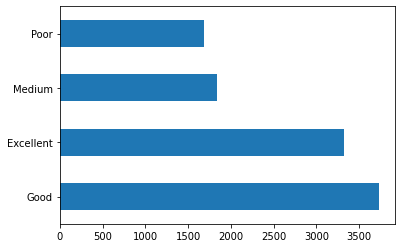

In [33]:
data['Quality'].value_counts().plot(kind='barh')
plt.show()

<AxesSubplot:>

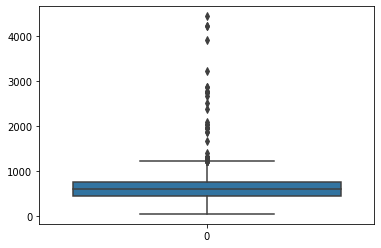

In [34]:
import seaborn as sns
sns.boxplot(data['Total Rating Value'])

In [35]:
deli = np.where(data['Total Rating Value']>1300)
print(deli[0])

[  798  2561  2951  3057  3064  3075  3744  3745  3898  3996  4773  4779
  4967  5202  6601  7937  8053  8054  8232  8262  8279  8844 10433 10434
 10436 10437 10438 10575 10576]


In [36]:
print(data)
data.drop(deli[0], inplace = True)
print(data)

      VILLAGE_NAME_ENGLISH    PH    EC  Organinc Carbon  PHOSPHOROUS  POTASH  \
0                KURUNDWAD  7.22  0.42             0.60         12.9   400.0   
1                 ARJUNWAD  7.59  1.10             0.70         26.0   560.0   
2                 ARJUNWAD  7.58  0.42             0.60         19.0   227.0   
3                 ARJUNWAD  7.52  0.45             0.50          8.0   188.0   
4                 ARJUNWAD  7.78  0.66             0.60          5.0   248.0   
...                    ...   ...   ...              ...          ...     ...   
10573               SHIROL  7.76  0.22             0.39         63.2   470.0   
10574               SHIROL  7.20  0.28             0.36         93.8   717.0   
10575          DATTANAGAR   8.08  0.38             0.72         83.2  3750.0   
10576               SHIROL  8.08  0.30             0.87         98.5  4255.0   
10577             ARJUNWAD  8.41  0.37             0.18         17.8   711.0   

       CALCIUM_CARBONATE  FERROUS  MANA

<AxesSubplot:>

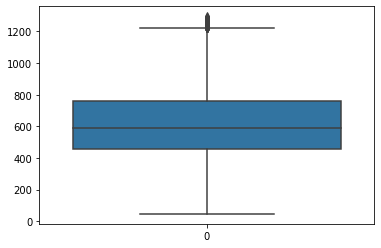

In [37]:
import seaborn as sns
sns.boxplot(data['Total Rating Value'])

In [38]:
x = data.iloc[:,:-2].values
print(x)
y = data.iloc[:,12].values
print(y)

[['KURUNDWAD' 7.22 0.42 ... 38.0 0.04 2.14]
 ['ARJUNWAD' 7.59 1.1 ... 40.0 0.6 5.0]
 ['ARJUNWAD' 7.58 0.42 ... 38.0 0.4 4.0]
 ...
 ['SHIROL' 7.76 0.22 ... 16.0 2.11 10.2]
 ['SHIROL' 7.2 0.28 ... 171.8 1.8 10.0]
 ['ARJUNWAD' 8.41 0.37 ... 14.4 0.98 9.11]]
['Medium', 'Good', 'Poor', 'Poor', 'Poor', ..., 'Excellent', 'Excellent', 'Good', 'Excellent', 'Excellent']
Length: 10549
Categories (4, object): ['Poor' < 'Medium' < 'Good' < 'Excellent']


In [39]:
from sklearn.preprocessing import LabelEncoder  
label_encoder_x= LabelEncoder()  



label_encoder_x.fit(x[:,0])
x_name_mapping = dict(zip(label_encoder_x.classes_, label_encoder_x.transform(label_encoder_x.classes_)))
print(x_name_mapping,"hi")


x[:, 0]= label_encoder_x.fit_transform(x[:, 0]) 
print(x)



{'AKIWAT': 0, 'ARJUNWAD': 1, 'BORGAON': 2, 'CHAND-SHIRADWAD': 3, 'CHINCHWAD': 4, 'DATTANAGAR ': 5, 'DHARANGUTTI': 6, 'JAMBHALI': 7, 'JANWAD': 8, 'KURUNDWAD': 9, 'MANGAVATI': 10, 'NANDANI': 11, 'RAJAPUR': 12, 'SADALGA': 13, 'SHAHAPUR': 14, 'SHEDBAL': 15, 'SHIRATI': 16, 'SHIRDHON': 17, 'SHIRGUPPI': 18, 'SHIROL': 19, 'TAKALI': 20, 'TERWAD': 21, 'UDGAON': 22} hi
[[9 7.22 0.42 ... 38.0 0.04 2.14]
 [1 7.59 1.1 ... 40.0 0.6 5.0]
 [1 7.58 0.42 ... 38.0 0.4 4.0]
 ...
 [19 7.76 0.22 ... 16.0 2.11 10.2]
 [19 7.2 0.28 ... 171.8 1.8 10.0]
 [1 8.41 0.37 ... 14.4 0.98 9.11]]


In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([("VILLAGE_NAME_ENGLISH", OneHotEncoder(), [0])], remainder = 'passthrough')
x = ct.fit_transform(x)
print(x)

[[0.0 0.0 0.0 ... 38.0 0.04 2.14]
 [0.0 1.0 0.0 ... 40.0 0.6 5.0]
 [0.0 1.0 0.0 ... 38.0 0.4 4.0]
 ...
 [0.0 0.0 0.0 ... 16.0 2.11 10.2]
 [0.0 0.0 0.0 ... 171.8 1.8 10.0]
 [0.0 1.0 0.0 ... 14.4 0.98 9.11]]


In [41]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)

In [42]:
print(x_train)

[[0.0 0.0 0.0 ... 1.6 0.8 0.6]
 [0.0 0.0 0.0 ... 10.5 0.5 6.1]
 [0.0 0.0 0.0 ... 18.0 0.6 8.4]
 ...
 [0.0 0.0 0.0 ... 15.6 0.84 6.26]
 [0.0 0.0 0.0 ... 7.5 1.5 10.8]
 [0.0 0.0 0.0 ... 30.0 1.2 1.0]]


In [43]:
print(x_test)

[[0.0 0.0 0.0 ... 36.0 2.4 3.6]
 [0.0 0.0 0.0 ... 6.97 4.0 7.1]
 [0.0 0.0 0.0 ... 16.4 2.44 11.46]
 ...
 [0.0 0.0 0.0 ... 9.1 1.8 3.6]
 [0.0 0.0 0.0 ... 26.0 5.6 9.0]
 [0.0 0.0 0.0 ... 23.4 1.32 10.0]]


In [44]:
print(y_train)
print(y_train.value_counts())

['Poor', 'Excellent', 'Poor', 'Good', 'Good', ..., 'Good', 'Medium', 'Good', 'Excellent', 'Medium']
Length: 8439
Categories (4, object): ['Poor' < 'Medium' < 'Good' < 'Excellent']
Poor         1356
Medium       1468
Good         3015
Excellent    2600
dtype: int64


In [45]:
print(y_test)
print(y_test.value_counts())

['Poor', 'Excellent', 'Medium', 'Excellent', 'Excellent', ..., 'Good', 'Excellent', 'Excellent', 'Excellent', 'Good']
Length: 2110
Categories (4, object): ['Poor' < 'Medium' < 'Good' < 'Excellent']
Poor         333
Medium       365
Good         714
Excellent    698
dtype: int64


In [46]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)  
print(x_train)

[[-0.15135749 -0.21017192 -0.21139839 ... -1.02290572 -0.32825945
  -1.46896398]
 [-0.15135749 -0.21017192 -0.21139839 ... -0.44252682 -0.46132589
   0.09165789]
 [-0.15135749 -0.21017192 -0.21139839 ...  0.04655651 -0.41697041
   0.74428159]
 ...
 [-0.15135749 -0.21017192 -0.21139839 ... -0.10995015 -0.31051726
   0.1370578 ]
 [-0.15135749 -0.21017192 -0.21139839 ... -0.63816016 -0.0177711
   1.42528022]
 [-0.15135749 -0.21017192 -0.21139839 ...  0.82908986 -0.15083754
  -1.35546421]]


In [47]:
x_test= st_x.transform(x_test) 
print(x_test)

[[-0.15135749 -0.21017192 -0.21139839 ...  1.22035653  0.38142821
  -0.61771569]
 [-0.15135749 -0.21017192 -0.21139839 ... -0.67272205  1.09111587
   0.37540732]
 [-0.15135749 -0.21017192 -0.21139839 ... -0.05778126  0.3991704
   1.61255485]
 ...
 [-0.15135749 -0.21017192 -0.21139839 ... -0.53382238  0.11529534
  -0.61771569]
 [-0.15135749 -0.21017192 -0.21139839 ...  0.56824541  1.80080353
   0.91453125]
 [-0.15135749 -0.21017192 -0.21139839 ...  0.39869652 -0.09761096
   1.19828068]]


In [48]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [49]:
y_pred= classifier.predict(x_test)
print(y_pred)

['Poor' 'Excellent' 'Medium' ... 'Excellent' 'Excellent' 'Good']


In [50]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 

In [51]:
print(cm)

[[661  37   0   0]
 [ 13 674  26   1]
 [  0  27 321  17]
 [  0   0  36 297]]


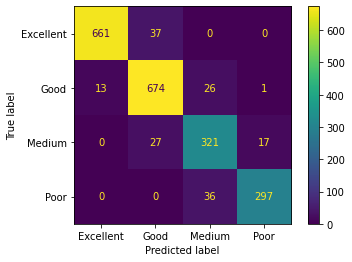

Accuracy =  0.9255924170616113


In [52]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Excellent','Good','Medium','Poor'])

cm_display.plot()
plt.show()

# [[659  39   0   0]
#  [ 19 673  22   0]
#  [  0  18 329  18]
#  [  0   1  27 305]]


accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy = ",accuracy)

